### Task 5. Algorithms on graphs. Introduction to Graphs and basic algorithms on graphs

### 5.1 Generate a random adjacency matrix for a simple undirected unweighted graph with 100 vertices and 200 edges (note that the matrix must be symmetric and contain only 0 and 1 as elements). Transform the matrix intoan adjacency list. 

### Visualize the graph and output several rows of the adjacency matrix and the adjacency list. For what purposes is it more convenient to useeach of the views?

Adjacency matrix fragment:

 [[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Adjacency list fragment:

0: [1, 20, 62]
1: [0, 48, 49, 75]
2: [47, 58, 79]
3: [11, 28, 61, 82, 91]
4: [10, 37, 56, 85, 86]
5: [55, 95, 96]
6: [32, 36, 84]
7: [61, 76, 99]
8: [21, 24, 40, 43, 54, 59, 70, 71]
9: [13, 15, 51, 83, 99]

Graph vizualization:


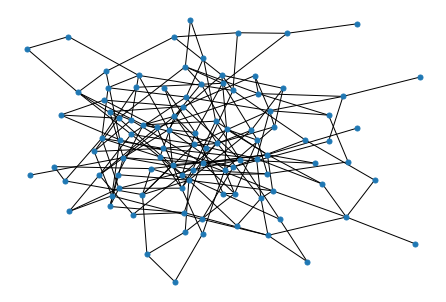

In [101]:
import random
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


def adj_matrix(nodes_num, connections_num):
    
    """ random generation of adjacency matrix with
    fixed numbers of nodes and connections """
    
    matrix = np.zeros([nodes_num, nodes_num])
    counter = 0

    while counter < connections_num:

        i, j = random.sample([i for i in range(nodes_num)], 2)

        if matrix[i][j] == 0:

            matrix[i][j] = matrix[j][i] = 1
            counter += 1
            
    return matrix


def adj_list(adj_matrix):  
    
    """ generation of adjacency list from adjacency matrix """
        
    return [list(np.where(adj_matrix[i] == 1)[0]) for i in range(len(adj_matrix))]


# Testing----------------------------

random.seed(21) #2, 9, 14 - another connected graphs
nodes_num, connections_num = 100, 200

adj_matrix = adj_matrix(nodes_num, connections_num)  
print('Adjacency matrix fragment:\n\n', adj_matrix)

print('\nAdjacency list fragment:\n')

i = 0
adj_list = adj_list(adj_matrix)

for tmp in adj_list[:10]:
    print('{}: {}'.format(i, tmp))
    i += 1

print('\nGraph vizualization:')
graph = nx.Graph(adj_matrix)
nx.draw(graph, node_size = 25)

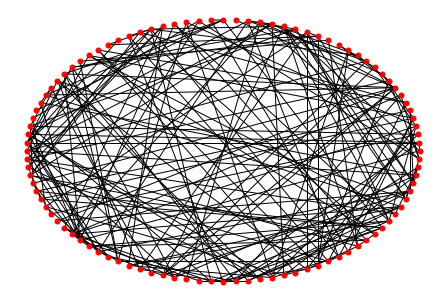

In [102]:
nx.draw_circular(graph, node_color = 'red', node_size = 25, with_labels = False)

----------------------------------------------------------------------------------------------------------------------------

### 5.2 Use Depth-first search to find connected components of the graph and Breadth-first search to find a shortest path between two random vertices. Analyse the results obtained.


In [132]:
def DFS(node):
    
    res = []
    pairs_gen = nx.dfs_edges(graph, node)
    
    for pair in pairs_gen:
        res.append(pair) 
    
    return np.array(res)

def BFS_path(start_node, stop_node):
    
    pairs = []
    pairs_gen = nx.bfs_edges(graph, stop_node)
    
    for pair in pairs_gen:
        pairs.append(pair)
        if start_node in pair:
            break
            
    path = [start_node]
    node_curr = start_node
    
    for i in range(len(pairs) - 1, -1, -1):
        if pairs[i][1] == node_curr:
            node_curr = pairs[i][0]
            path.append(node_curr)

    return np.array(path)


# Testing----------------------------

np.random.seed(21)
a, b = np.random.randint(0, nodes_num, 2)
print('Selected nodes: {}, {} \n'.format(a, b))

#BFS_path(a, b) == nx.dijkstra_path(graph, a, b)

print('Fragment of list connected components of the graph finded using DFS: \n\n{}'.format(DFS(a)[:15]))

print('\nPath beetween randomly selected nodes finded using BFS: \n\n{}'.format(BFS_path(a, b)))

Selected nodes: 73, 79 

Fragment of list connected components of the graph finded using DFS: 

[[73 62]
 [62  0]
 [ 0  1]
 [ 1 48]
 [48 23]
 [23 12]
 [12 50]
 [50 21]
 [21  8]
 [ 8 24]
 [ 8 40]
 [40 25]
 [25 26]
 [26 86]
 [86  4]]

Path beetween randomly selected nodes finded using BFS: 

[73 62 47  2 79]
